# Housing 


 ## Introduction

***
The data contains information from the 1990 California census. So although it may not help you with predicting current housing prices like the Zillow Zestimate dataset, it does provide an accessible introductory dataset for teaching people about the basics of machine learning.
***

 ## Content

The data pertains to the houses found in a given California district and some summary stats about them based on the 1990 census data. Be warned the data aren't cleaned so there are some preprocessing steps required! The columns are as follows, their names are pretty self explanitory:
***
- longitude
- latitude
- housingmedianage
- total_rooms
- total_bedrooms
- population
- households
- median_income
- medianhousevalue
- ocean_proximity
***

In [1]:
!pip install plotly

In [1]:
!pip install folium

You should consider upgrading via the 'c:\users\kush\anaconda3\python.exe -m pip install --upgrade pip' command.


In [90]:
# Importing important libraries
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline 
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import folium as folium
from folium import plugins
from folium.plugins import HeatMap

# importing transformers and pipeline(scikit-learn)
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder

# library for splitting data into train and Test
from sklearn.model_selection import StratifiedShuffleSplit

#ignore warnings produced by jupyter
import warnings
warnings.simplefilter('ignore')

#display all the columns of a dataframe
pd.pandas.set_option('display.max_columns', None)

## Reading data from csv

In [3]:
data = pd.read_csv("C:\\Users\\KUSH\\Desktop\\Learning repos\\Machine_Learning_Practice\\Regression\\Housing\\housing.csv") 

In [4]:
data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [5]:
print(f"Total number of rows in the dataframe is :{data.shape[0]}\nTotal number of columns in the dataframe is: {data.shape[1]}")

Total number of rows in the dataframe is :20640
Total number of columns in the dataframe is: 10


## Data Description

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


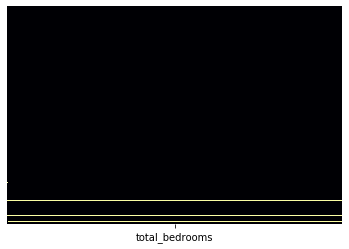

In [7]:
# visualising NULLs 
sns.heatmap(data.loc[:, data.columns[data.isnull().any()]].isnull(), yticklabels=False, cbar= False, cmap='inferno') 

In [8]:
# Describing measure of all the numerical columns
data.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [9]:
# Chekcing number of unique values in a dataframe 
for ele in data.columns:
    print(f"{ele} has: {data[ele].nunique()} unique values")


longitude has: 844 unique values
latitude has: 862 unique values
housing_median_age has: 52 unique values
total_rooms has: 5926 unique values
total_bedrooms has: 1923 unique values
population has: 3888 unique values
households has: 1815 unique values
median_income has: 12928 unique values
median_house_value has: 3842 unique values
ocean_proximity has: 5 unique values


All the columns we are going to retrieve since all of them have more than 1 unique values

## Analysing Distribution

In [10]:
# Getting all the numerical columns from the dataframe 
df_numbers = data.select_dtypes(include=np.number)
df_numbers.drop(['longitude', 'latitude'], axis = 1, inplace =True)

In [11]:
df_numbers.columns

Index(['housing_median_age', 'total_rooms', 'total_bedrooms', 'population',
       'households', 'median_income', 'median_house_value'],
      dtype='object')

Text(0.5, 1.0, 'median house value distribution')

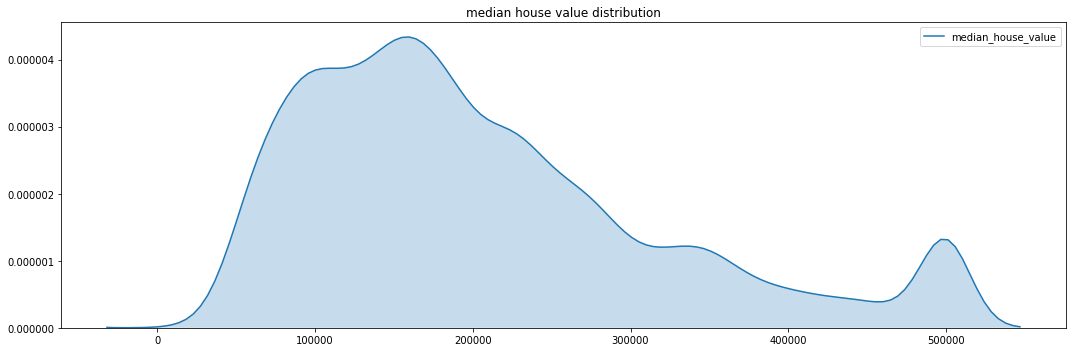

In [12]:
#Distribution of target variable i.e "median_house_value"
fig, axs = plt.subplots(1, 1,
                        figsize =(15, 5), 
                        tight_layout = True)
sns.kdeplot(data['median_house_value'], shade=True).set_title("median house value distribution")

**median_house_value** has a wide spread range. It starts from __1499__ and goes till __500001__

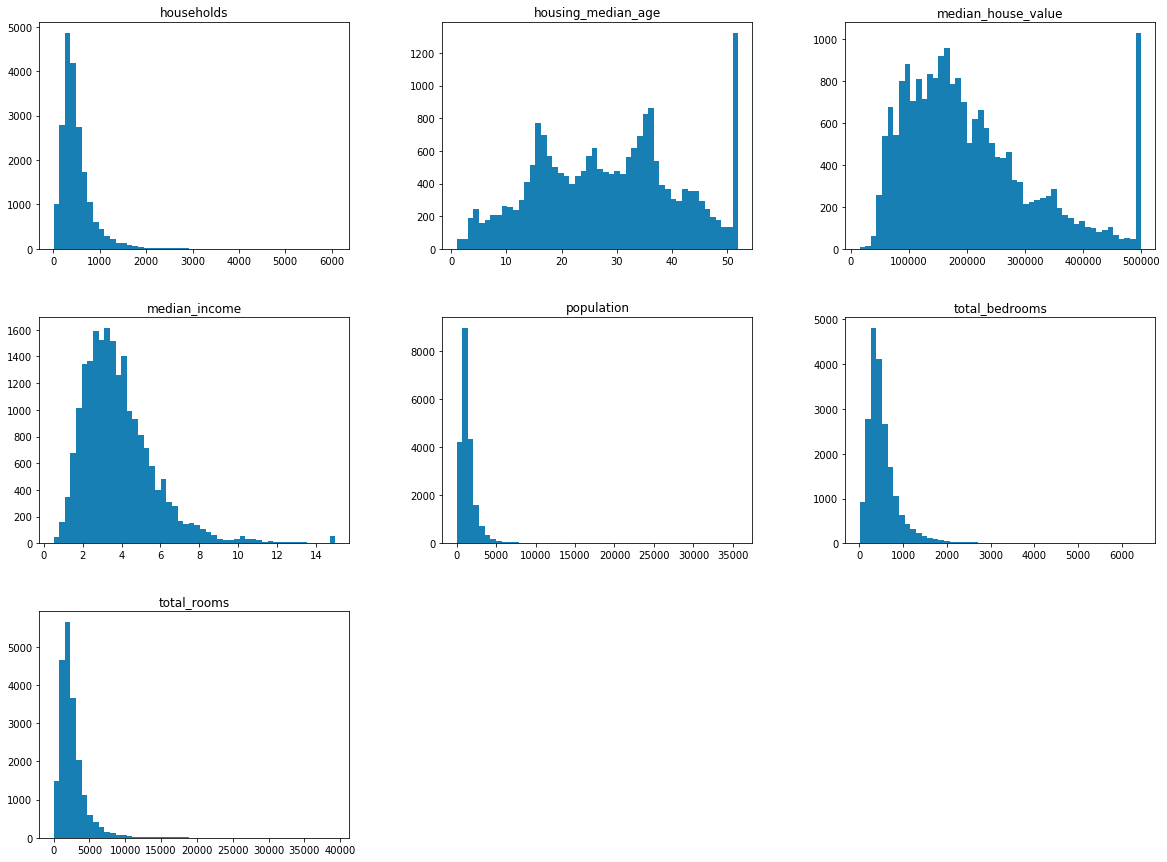

In [13]:
df_numbers.hist(bins=50, figsize=(20,15), grid=False, color='#177fb3')
plt.show()

We can clearly observe that some of the variables that are present in the data are little skewed
***
Some findings from the above plot:
***
- Median Income is not in the scale of **USD $** 
- There are so many houses who's median_age is more than 50 yrs
- Minimum age set for the house is 1 year and the maximum is 52 yrs

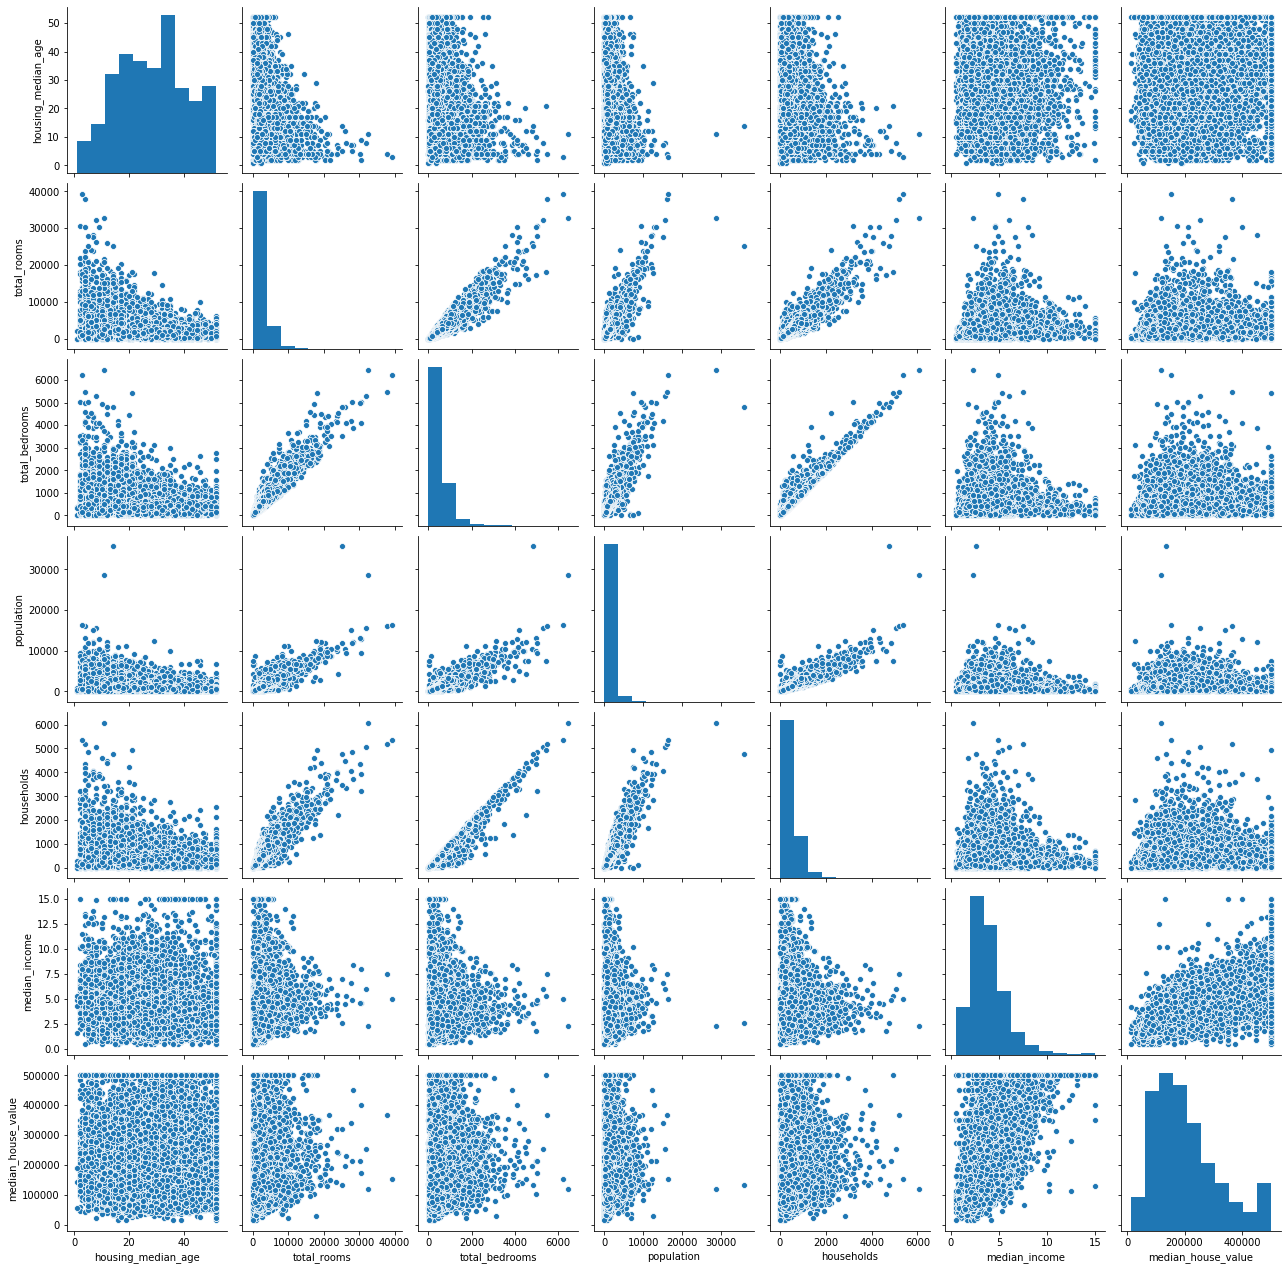

In [14]:
#Analysing relations between numerical features of the dataframe 
sns.pairplot(df_numbers)

<a id='another_cell'></a>

From the above graph we can see that the relationship between the target (median_house_value) doesn't have a proper liner relationship with any of the other variable. If we look into the independent variables, we can clearly see that there are few features, which define the clear linear relationship among them. Few of them would be:

- Total_rooms & Total_Bedrooms
- Household & Total_bedrooms
- Household and population
- populations & total_room

We'll plot the correlation matrix for these variables in the later stages

## Plotting Heatmap to see the density of the records with respect to the location data

In [99]:
california_map = folium.Map(location=[36.7783,-119.4179], zoom_start = 6, min_zoom=5)
df_map = data[['latitude', 'longitude']]
data_1 = [[row['latitude'],row['longitude']] for index, row in df_map.iterrows()]
_ = HeatMap(data_1, radius=10).add_to(california_map)
california_map

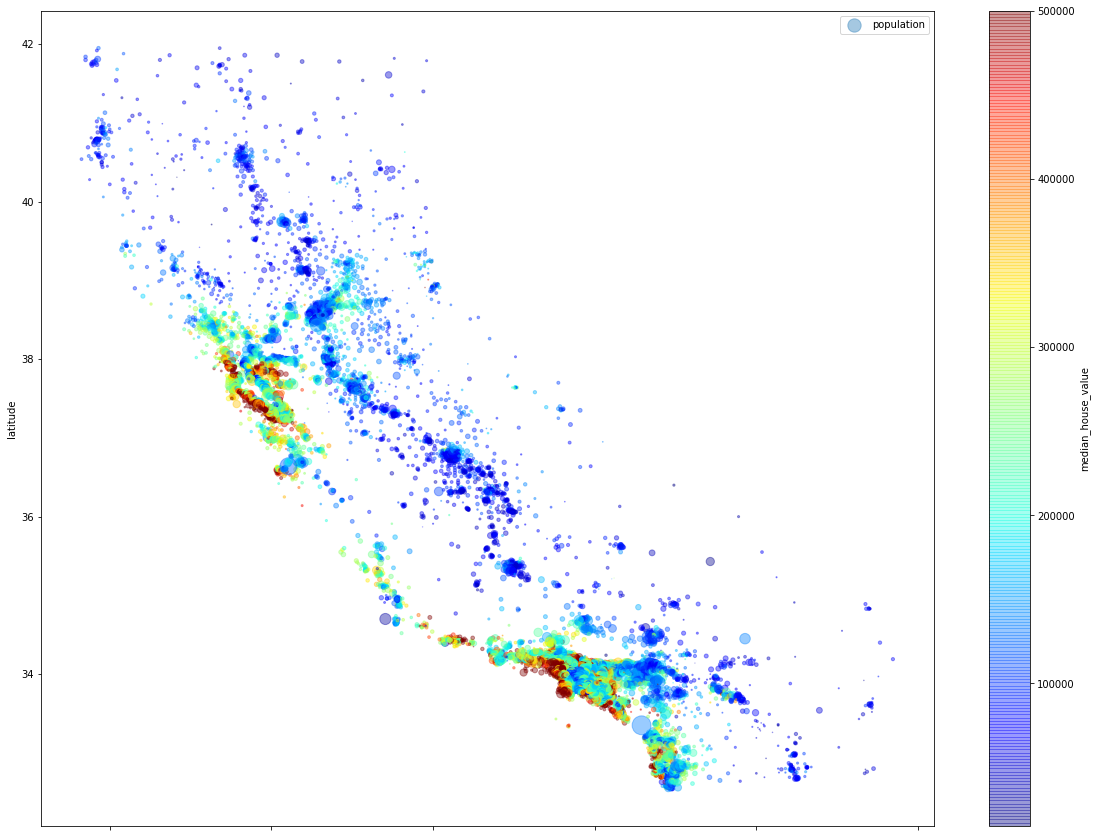

In [16]:
data.plot(kind="scatter", x ="longitude", y= "latitude", alpha = 0.4,
         s= data["population"]/100, label = "population", figsize=(20,15),
         c = "median_house_value", cmap= plt.get_cmap("jet"), colorbar = True,
         )
plt.legend()

## Plotting correlation between the features

We'll be using the **df_numbers** dataframe to check the correlation of features as it only contains the numerical features

In [17]:
df_numbers.head()

,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0
1,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0
2,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0
3,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0
4,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0


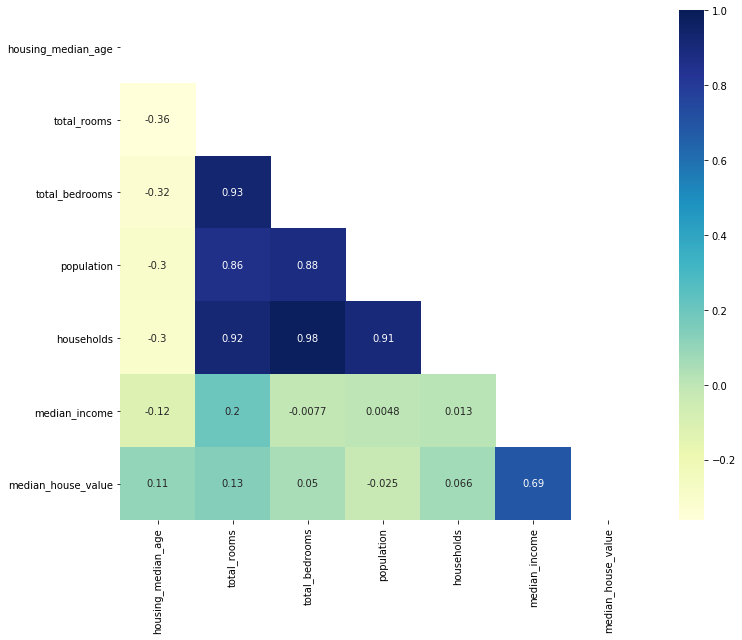

In [18]:
fig, axs = plt.subplots(1, 1,
                        figsize =(11, 9), 
                        tight_layout = True)
corr = df_numbers.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
sns.heatmap(corr,cmap="YlGnBu", mask =mask, annot = True)
plt.show()

Outcome of this we have already discussed [above](#another_cell)

In [19]:
# Checking highly corelated columns with respect to SalePrice
print (corr['median_house_value'].sort_values(ascending=False)[:3], '\n') #top 3 values
print ('----------------------')
print (corr['median_house_value'].sort_values(ascending=False)[-3:]) #last 3 values`

median_house_value    1.000000
median_income         0.688075
total_rooms           0.134153
Name: median_house_value, dtype: float64 

----------------------
households        0.065843
total_bedrooms    0.049686
population       -0.024650
Name: median_house_value, dtype: float64


**Median_Income** has shown the highest correlation among all the features. Let's plot the relation between median_house_value and median_income to understand the relationship between them 


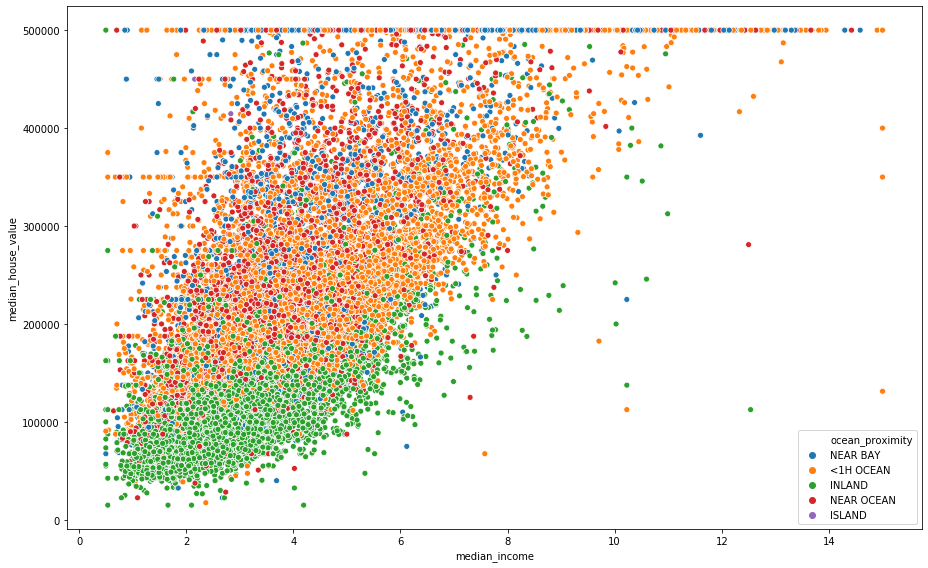

In [20]:
fig, axs = plt.subplots(1, 1,
                        figsize =(13, 8), 
                        tight_layout = True)
sns.scatterplot( x="median_income", y= "median_house_value", hue = "ocean_proximity", data = data)

From the above graph we can ifer that the cost of the houses in **INLAND** region is low and form a separate cluster. **NEAR_BAY** region shows high house values 

In [21]:
## Ananlysisi on median income
data['income_cat'] = pd.cut(data['median_income'],
                           bins = [0, 1.5, 3.0, 4.5, 5, 6, np.inf],
                           labels=[1,2,3,4,5,6])
data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,income_cat
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,6
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,6
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,6
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,5
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,3


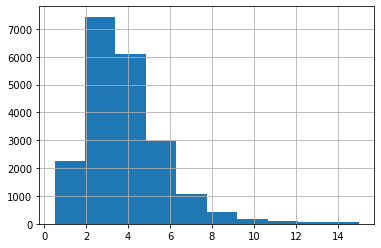

In [22]:
data['median_income'].hist()

## Data Preprocessing

### Writing a Custom transformer for Data preprocessing

In [82]:
data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,income_cat
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,6
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,6
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,6
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,5
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,3


In [33]:
# Cutom transformer

class NumDataPreprocessing(BaseEstimator, TransformerMixin):
    df = data.copy()
    grouped = df.groupby(['ocean_proximity', 'income_cat'])['total_bedrooms'].agg(Average='median').reset_index()
    
    def __init__(self, dataframe = True):
        self.dataframe = dataframe
        
    def fit(self, X, y=None):
        return self # nothing else to do
    
    def transform(self, X, y=None):
        X['total_bedrooms'] = X.apply(
                               lambda row: self.grouped[(self.grouped.ocean_proximity == row['ocean_proximity']) & (self.grouped.income_cat == row['income_cat'])]['Average'].values[0] if np.isnan(row['total_bedrooms']) else row['total_bedrooms'],
                                axis=1
                                    ) # imputing Null values in total_brdrooms
        X['rooms_per_household'] = X['total_rooms']/X['households'] ## feature extraction
        X['total_bedrooms_per_household'] = X['total_bedrooms']/X['households']
        X['population_per_household'] = X['population']/X['households']
        globals()['column_values'] = X.columns
        return X
    
# attr_adder = CombinedDataPreprocessing()
# final = attr_adder.transform(data)

In [34]:
##creating a pipleline for numerical columns
main_pipeline = Pipeline([
    ('combined_transformer', NumDataPreprocessing())
])

In [35]:
cat_attributes = ["ocean_proximity"]
df = data.copy()
full_pipeline = ColumnTransformer(transformers = [
    ('full_data', main_pipeline, df.columns),
    ('cat', OneHotEncoder(), cat_attributes)
])

final_df = full_pipeline.fit_transform(df)

In [76]:
#craeting final list of all the column names after data preprocessing
column_values_final = column_values_final + sorted(data['ocean_proximity'].unique())

## Dropping unnecessary columns

In [87]:
# creating a dataframe from numpy array after data preprocessing

dataframe = pd.DataFrame(data = final_df, 
                  index = [*range(0, len(final_df))], 
                  columns = column_values_final)

In [88]:
dataframe.tail()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,income_cat,rooms_per_household,total_bedrooms_per_household,population_per_household,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
20635,-121.09,39.48,25,1665,374,845,330,1.5603,78100,INLAND,2,5.04545,1.13333,2.56061,0,1,0,0,0
20636,-121.21,39.49,18,697,150,356,114,2.5568,77100,INLAND,2,6.11404,1.31579,3.12281,0,1,0,0,0
20637,-121.22,39.43,17,2254,485,1007,433,1.7,92300,INLAND,2,5.20554,1.12009,2.32564,0,1,0,0,0
20638,-121.32,39.43,18,1860,409,741,349,1.8672,84700,INLAND,2,5.32951,1.17192,2.12321,0,1,0,0,0
20639,-121.24,39.37,16,2785,616,1387,530,2.3886,89400,INLAND,2,5.25472,1.16226,2.61698,0,1,0,0,0


In [89]:
# Dropping 'ocean_proximity' since it's been already encoded
dataframe.drop(['ocean_proximity'], axis = 1, inplace = True)
dataframe.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,income_cat,rooms_per_household,total_bedrooms_per_household,population_per_household,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,-122.23,37.88,41,880,129,322,126,8.3252,452600,6,6.98413,1.02381,2.55556,0,0,0,1,0
1,-122.22,37.86,21,7099,1106,2401,1138,8.3014,358500,6,6.23814,0.97188,2.10984,0,0,0,1,0
2,-122.24,37.85,52,1467,190,496,177,7.2574,352100,6,8.28814,1.07345,2.80226,0,0,0,1,0
3,-122.25,37.85,52,1274,235,558,219,5.6431,341300,5,5.81735,1.07306,2.54795,0,0,0,1,0
4,-122.25,37.85,52,1627,280,565,259,3.8462,342200,3,6.28185,1.08108,2.18147,0,0,0,1,0


## Train Test Split

In [92]:
split=StratifiedShuffleSplit(n_splits = 1, test_size = 0.2, random_state = 42)
for train_index, test_index in split.split(dataframe, dataframe['income_cat']):
    strat_train_set = dataframe.loc[train_index]
    strat_test_set = dataframe.loc[test_index]

In [98]:
strat_train_set["income_cat"].value_counts()/len(strat_train_set)

3    0.350594
2    0.318859
6    0.114402
5    0.103077
4    0.073219
1    0.039850
Name: income_cat, dtype: float64

## Feature Selection

In [29]:
## Data Scaling

In [30]:
## categorical data encoding